In [83]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style as style

In [84]:
#make sure that the csv file is in the same subfolder as this notebook
df=pd.read_csv("../data/mobiles1.csv")
#the 2 dots before the / means go back one folder as the data folder is outside the notebooks folder
df.head() #shows data in a tabular format


,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot


In [85]:
df.tail() #shows last 5 rows

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
979,2000 mAh Battery,5MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) FWVGA Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 MB,"Micromax Bharat 4 (Black, 8 GB)",3590,12 Months Brand Warranty,3.8,105 Reviews,NaN
980,2680 mAh Li-Ion Battery,13MP Rear Camera | 5MP Front Camera,13.21 cm (5.2 inch) Full HD Display,3 GB RAM | 32 GB ROM,"Nextbit Robin (Ember, 32 GB)",19999,Qualcomm Snapdragon 808 MSM8992 Processor,4.0,516 Reviews,Brand Warranty of 1 Year
981,4550 mAh Battery,13MP + 5MP | 20MP Front Camera,15.24 cm (6 inch) Full HD Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,"Gionee A1 Plus (Mocha Gold, 64 GB)",10499,Helio P25 MT 6757CD Processor,4.1,710 Reviews,Brand Warranty of 1 Year Available for Mobile ...
982,2100 mAh Li-Ion Battery,8MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) HD Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 GB,"XOLO Omega 5.0 (Black, 8 GB)",8990,MTK 6592M Processor,3.8,81 Reviews,1 Year Manufacturer Warranty
983,3000 mAh Battery,12MP Rear Camera | 8MP Front Camera,14.73 cm (5.8 inch) Quad HD+ Display,4 GB RAM | 256 GB ROM | Expandable Upto 400 GB,"Samsung Galaxy S9 (Midnight Black, 256 GB)",65900,Exynos 9810 Processor,4.4,"2,331 Reviews",Brand Warranty of 1 Year Available for Mobile ...


In [86]:
df.sample(5) #displays 5 random rows

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
52,4000 mAh Battery,48MP + 8MP + 2MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) Display,6 GB RAM | 256 GB ROM,"OPPO Reno2 F (Lake Green, 256 GB)",17990,MTK MT6771V(P70) 64bit Processor,4.5,210 Reviews,Brand Warranty of 1 Year Available for Mobile ...
882,3500 mAh Li-ion Battery,16MP + 2MP | 16MP Front Camera,16.0 cm (6.3 inch) Full HD+ Display,6 GB RAM | 64 GB ROM | Expandable Upto 256 GB,"Realme 2 Pro (Ice Lake, 64 GB)",13990,Qualcomm Snapdragon 660 Octa Core 1.95GHz AIE ...,4.5,"10,038 Reviews",Brand Warranty of 1 Year Available for Mobile ...
910,4000 mAh Li-polymer Battery,48MP + 5MP | 13MP Front Camera,16.0 cm (6.3 inch) Full HD+ Display,6 GB RAM | 64 GB ROM | Expandable Upto 256 GB,"Redmi Note 7 Pro (Astro Moonlight White, 64 GB)",12999,Qualcomm Snapdragon 675 Processor,4.4,"25,217 Reviews",Quick Charge 4.0 Support
582,2500 mAh Battery,8MP Rear Camera | 5MP Front Camera,13.97 cm (5.5 inch) HD Display,2 GB RAM | 16 GB ROM | Expandable Upto 64 GB,"Blackbear B6 Glory (Blue, 16 GB)",4999,High Speed 1.3 GHz Quad Core Processor,2.7,0 Reviews,1 Year manufacturer warranty for device and 6 ...
941,1750 mAh Battery,2MP Rear Camera,10.16 cm (4 inch) Display,1 GB RAM | 8 GB ROM,"Zen Admire Shine (Red, 8 GB)",3099,1 Year,3.6,103 Reviews,NaN


In [87]:
df.info() #gives info about the data types and null values
#object in output means string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   battery    984 non-null    object 
 1   camera     984 non-null    object 
 2   display    984 non-null    object 
 3   memory     984 non-null    object 
 4   name       984 non-null    object 
 5   price      984 non-null    int64  
 6   processor  983 non-null    object 
 7   rating     971 non-null    float64
 8   reviews    971 non-null    object 
 9   warranty   836 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 77.0+ KB


In [88]:
df.describe() #gives statistical info about numerical columns
#count = number of non-null entries
#values below 25% and above 75% are outliers

,price,rating
count,984.000000,971.000000
mean,15429.848577,4.241195
std,12891.355967,0.300296
min,887.000000,2.700000
25%,7499.000000,4.100000
50%,11649.000000,4.300000
75%,17999.250000,4.400000
max,104999.000000,4.900000


In [89]:
df.isnull().sum() #displays number of null values  

battery        0
camera         0
display        0
memory         0
name           0
price          0
processor      1
rating        13
reviews       13
warranty     148
dtype: int64

In [90]:
df.duplicated().sum()

np.int64(24)

In [91]:
df.drop_duplicates(inplace=True) #drops duplicate rows

In [92]:
df['rating'].fillna(df['rating'].median(), inplace=True)
df['warranty'].fillna("No Warranty", inplace=True)
#filling in missing data

C:\Users\Mahi\AppData\Local\Temp\ipykernel_28300\3362117215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].median(), inplace=True)
C:\Users\Mahi\AppData\Local\Temp\ipykernel_28300\3362117215.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [93]:
print(df.dtypes)

battery       object
camera        object
display       object
memory        object
name          object
price          int64
processor     object
rating       float64
reviews       object
warranty      object
dtype: object


In [ ]:
df['price'] = df['price'].astype(float) #converts price column to float data type
df['rating']=df['rating'].astype(int)#rating need not be in float so converting it to int
#note all values need to be filled, there cant be any missing values, before converting to int

In [104]:
print(df.dtypes)

battery       object
camera        object
display       object
memory        object
name          object
price        float64
processor     object
rating         int64
reviews       object
warranty      object
dtype: object


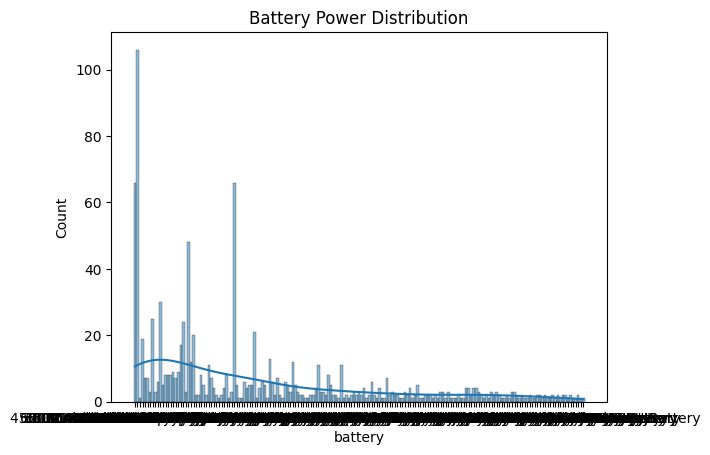

In [95]:
#plotting battery power distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['battery'], kde=True)
plt.title('Battery Power Distribution')
plt.show()
#but the x axis is not visible properly

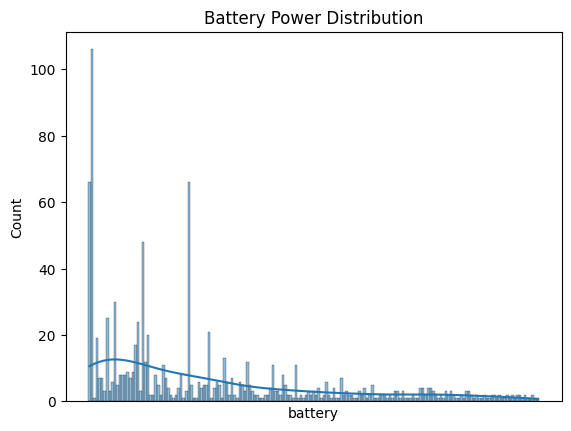

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['battery'], kde=True)
plt.title('Battery Power Distribution')
plt.xticks([])  #using this to remove the x axis labels
plt.show()

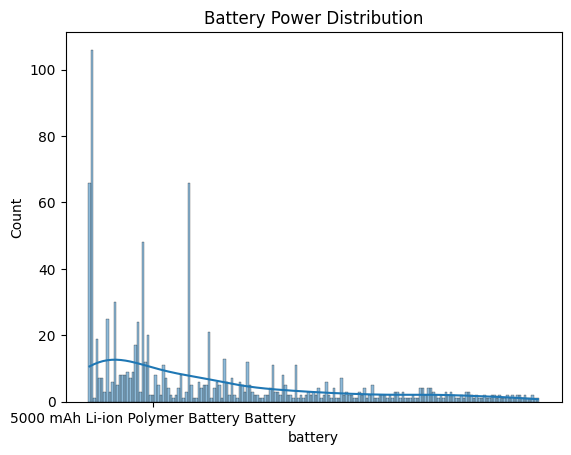

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['battery'], kde=True)
plt.title('Battery Power Distribution')
plt.xticks([25])  #to see only 25th value on x axis with its label
plt.show()

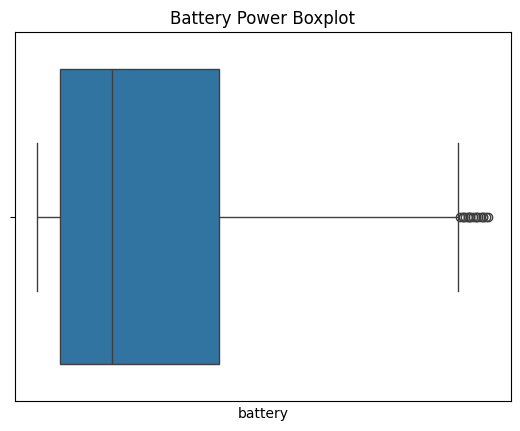

In [ ]:
#lets start with boxplot
sns.boxplot(x=df['battery'])
plt.title('Battery Power Boxplot')
plt.xticks([])
plt.show()
#small circles are called outliers
#some battries perform very well or they may be mistakes in data entry

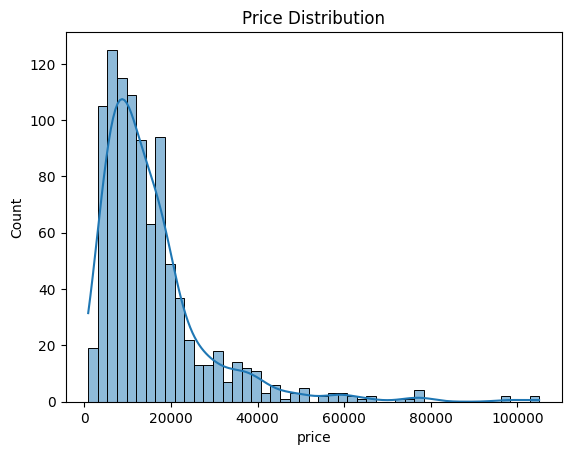

In [99]:
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()

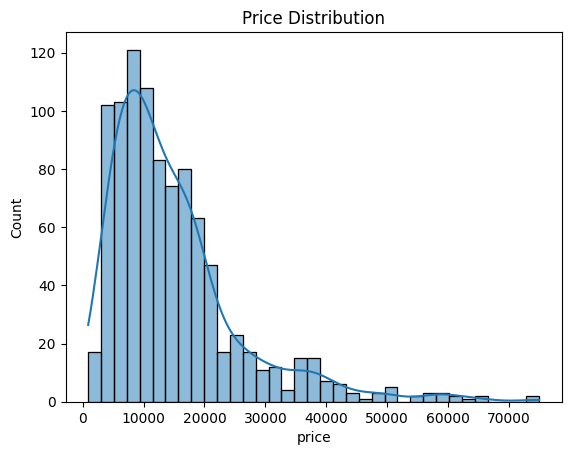

In [107]:
# Remove outliers where price > 75000
df = df[df['price'] <= 75000]
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()

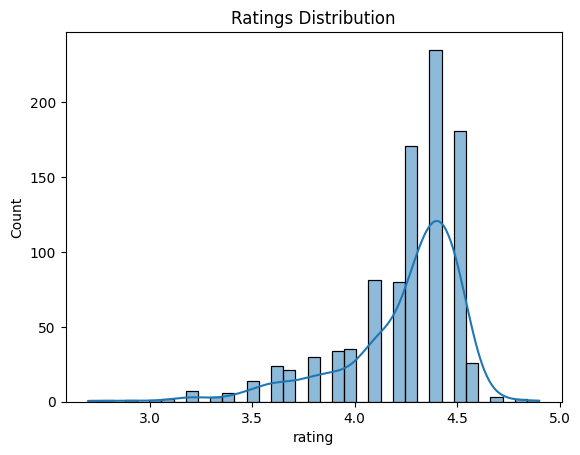

In [100]:
sns.histplot(df['rating'], kde=True)
plt.title("Ratings Distribution")
plt.show()

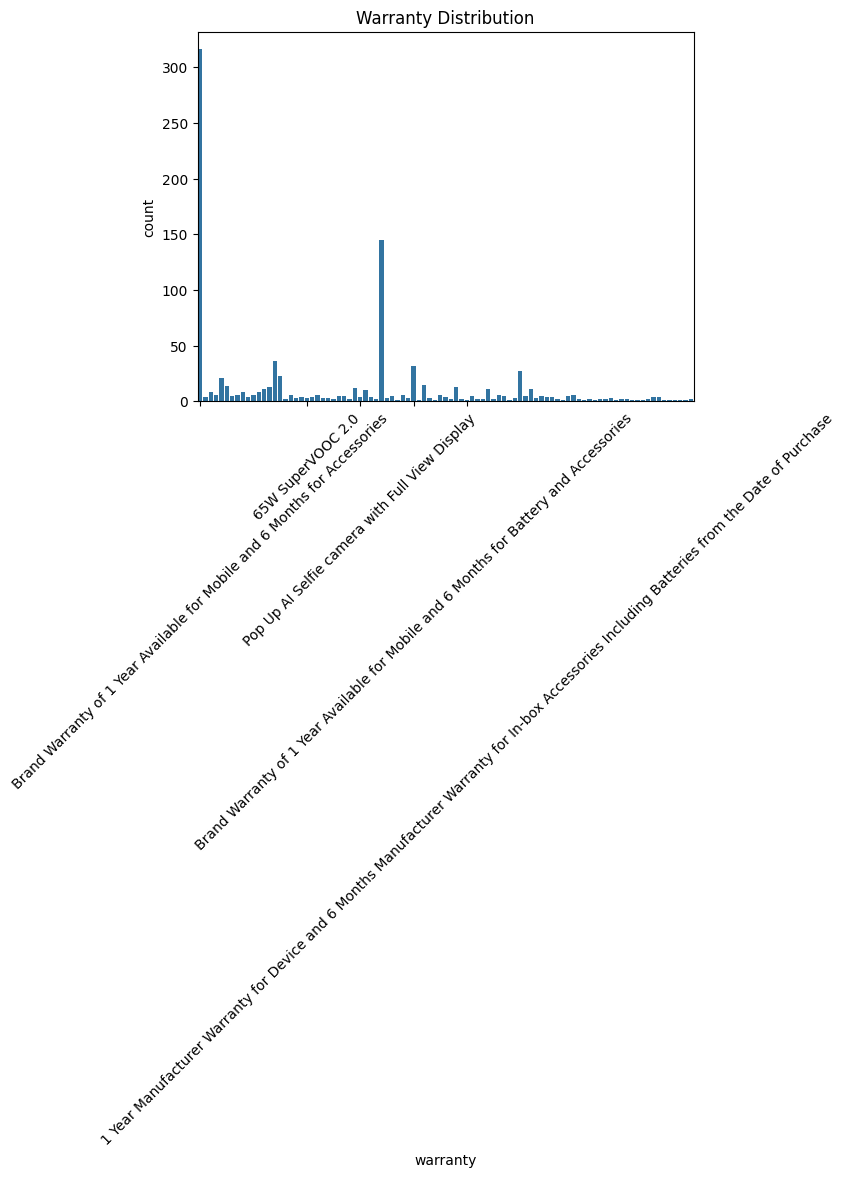

In [105]:
sns.countplot(x='warranty', data=df)
plt.title("Warranty Distribution")
plt.xticks(rotation=45)   # rotate labels if long text
plt.xticks([0, 20, 30, 40, 50])
plt.show()

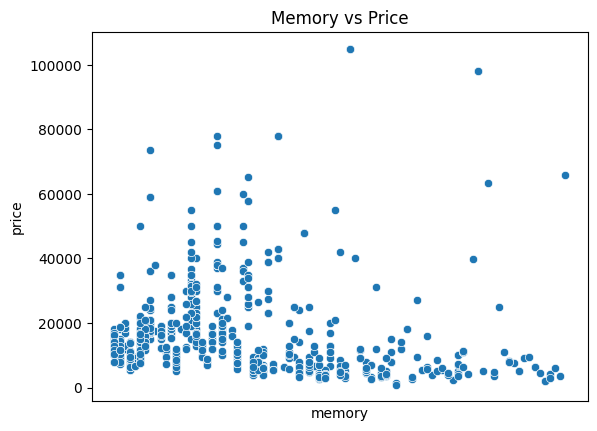

In [102]:
sns.scatterplot(x='memory', y='price', data=df)
plt.title("Memory vs Price")
plt.xticks([])
plt.show()
#you can always enter a particular number to check for its values
